Done by:
- ReJackTion (Ng Jack Lung)

# Can you even survive the Titanic shipwreck?
Description: This program predicts if a passenger will survive on the titanic

## 1. Load the dataset

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data from the seaborn package
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2. Understand the shape of the data

In [3]:
titanic.shape

(891, 15)

There are 891 rows/passengers and 15 columns/data points in the data set.

In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


After getting these statistics, I see the max price/fare a passenger paid for a ticket in this data set was 512.3292 British pounds, and the minimum price/fare was 0 British pounds.

We can also see that there is some missing data for the age column as it’s less than 891 (the number of passengers in this data set).

The mean age is 29.699 and the oldest passenger in this data set was 80 years old, while the youngest was only .42 years old (about 5 months).

In [5]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

There were more passengers that didn’t survive (549) than did (343).

<AxesSubplot:xlabel='survived', ylabel='count'>

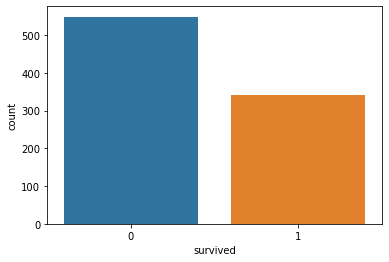

In [6]:
sns.countplot(titanic['survived'],label="Count")

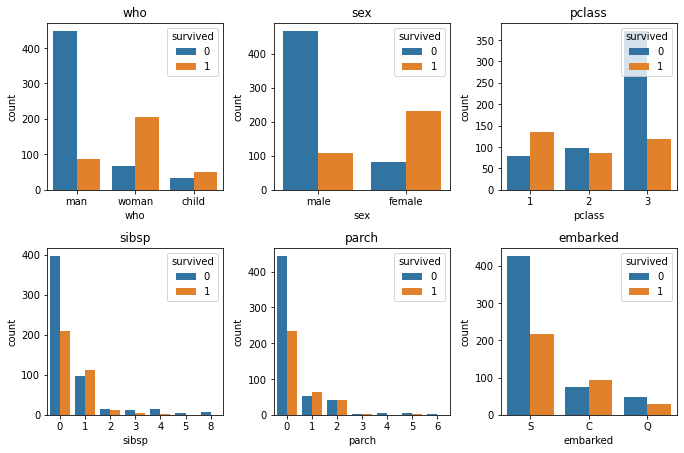

In [7]:
# Visualize the count of survivors for columns 'who', 'sex', 'pclass', 'sibsp', 'parch', and 'embarked'
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

n_rows = 2
n_cols = 3

# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(titanic[cols[i]], hue=titanic["survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="survived", loc='upper right') 
        
plt.tight_layout()   #tight_layout

Visualize the count of survivors for the columns *who, sex, pclass, sibsp, parch, and embarked*. 
From the charts above, we can see that a man (a male 18 or older) is not likely to survive from the chart who:
- Females are most likely to survive from the chart sex.
- Third class is most likely to not survive by chart pclass.
- If you have 0 siblings or spouses on board, you are not likely to survive according to chart sibsp.
- If you have 0 parents or children on board, you are not likely to survive according to the parch chart.
- If you embarked from Southampton (S), you are not likely to survive according to the embarked chart.

In [8]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


As we can see, about 74.2% of females survived and about 18.89% of males survived.

In [9]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='sex'>

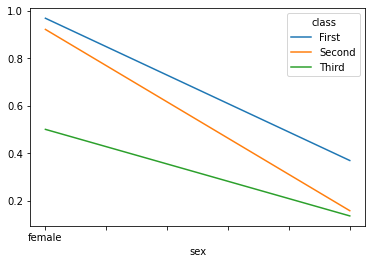

In [10]:
titanic.pivot_table('survived', index='sex', columns='class').plot()

From the pivot table above, we see that females in first class had a survival rate of about 96.8%, meaning the majority of them survived.
Males in third class had the lowest survival rate at about 13.54%, meaning the majority of them did not survive.

Let’s visualize the survival rate by sex and class.

<AxesSubplot:xlabel='class', ylabel='survived'>

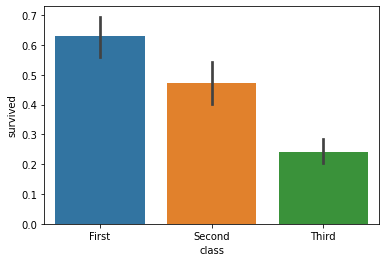

In [11]:
sns.barplot(x='class', y='survived', data=titanic)

A little over 60% of the passengers in first class survived. Less than 30% of passengers in third class survived. That means less than half of the passengers in third class survived, compared to the passengers in first class.

In [12]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

Note that, in this data set, the oldest person is aged 80, so that will be our age limit. We can see from the table below that women in first class that were 18 and older had the highest survival rate at 97.2973%, while men 18 and older in second class had the lowest survival rate of 7.1429%.

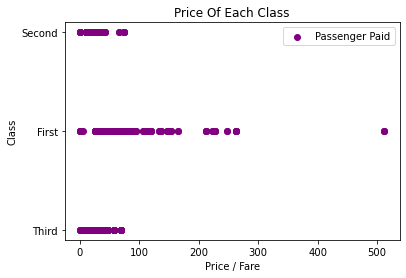

In [13]:
#Plot the Prices Paid Of Each Class
plt.scatter(titanic['fare'], titanic['class'],  color = 'purple', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price Of Each Class')
plt.legend()
plt.show()

## 3. Data Cleaning

In [14]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

To show some of the redundant columns, I will take a look at each column’s value count and name.

In [15]:
for val in titanic:
   print(titanic[val].value_counts())
   print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

Drop the redundant columns that are non-numerical and remove rows with missing values. I also decided to drop the column called *deck* because it’s missing 688 rows of data which means 688/891 = 77.22% of the data is missing for this column.

In [16]:
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'alone', 'adult_male', 'who'], axis=1)
titanic = titanic.dropna(subset =['embarked', 'age'])
titanic.shape

(712, 8)

## 4. Data Preprocessing

Checking which columns need to be transformed/encoded to numerical type of data.

In [17]:
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [18]:
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode sex column
titanic.iloc[:,2]= labelencoder.fit_transform(titanic.iloc[:,2].values)

#Encode embarked
titanic.iloc[:,7]= labelencoder.fit_transform(titanic.iloc[:,7].values)

print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


## 5. Data Exploration 

Let's have a look at the overall distribution.

a) For Numeric Data
- Made histograms to understand distributions
- Corrplot
- Pivot table comparing survival rate across numeric variables

b) For Categorical Data

- Made bar charts to understand balance of classes
- Made pivot tables to understand relationship with survival

### 5.1 Numeric Data

In [20]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

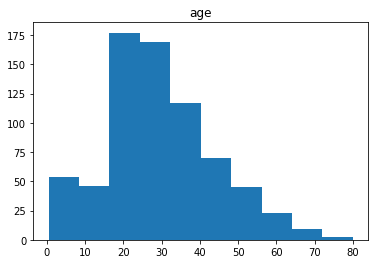

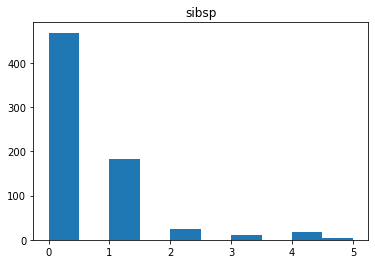

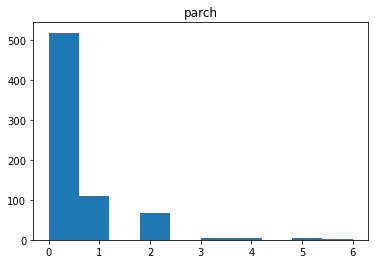

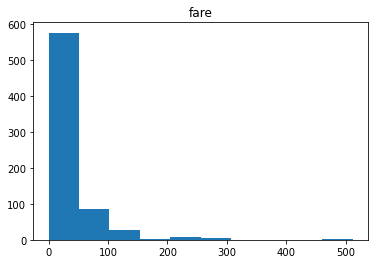

In [21]:
df_num = titanic[['age','sibsp','parch','fare']]
df_cat = titanic[['survived','pclass','sex', 'embarked']]
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

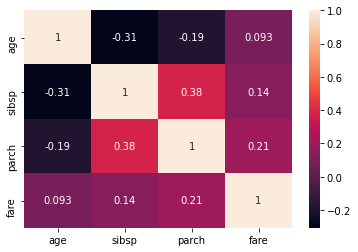

In [22]:
sns.heatmap(df_num.corr(), annot=True)

In [23]:
pd.pivot_table(titanic, index = 'survived', values = ['age','sibsp','parch','fare'])

,age,fare,parch,sibsp
survived,,,,
0,30.626179,22.965456,0.365566,0.525943
1,28.193299,51.647672,0.531250,0.496528


### 5.2 Categorical Data

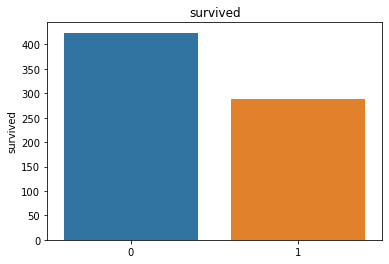

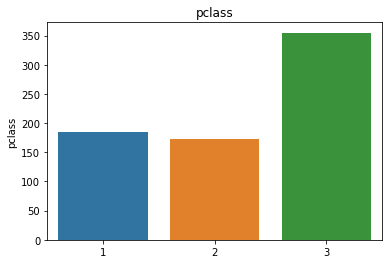

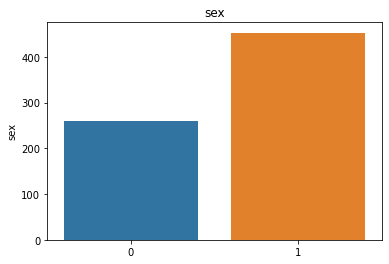

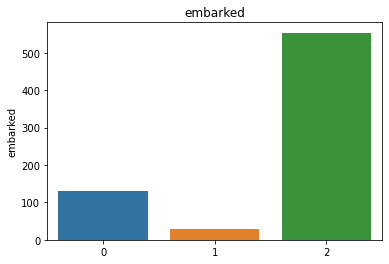

In [24]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [25]:
pd.pivot_table(titanic, index = 'survived', values = ['pclass','sex', 'embarked'])

,embarked,pclass,sex
survived,,,
0,1.712264,2.485849,0.849057
1,1.423611,1.878472,0.322917


### 5.3 Overall distribution of the data

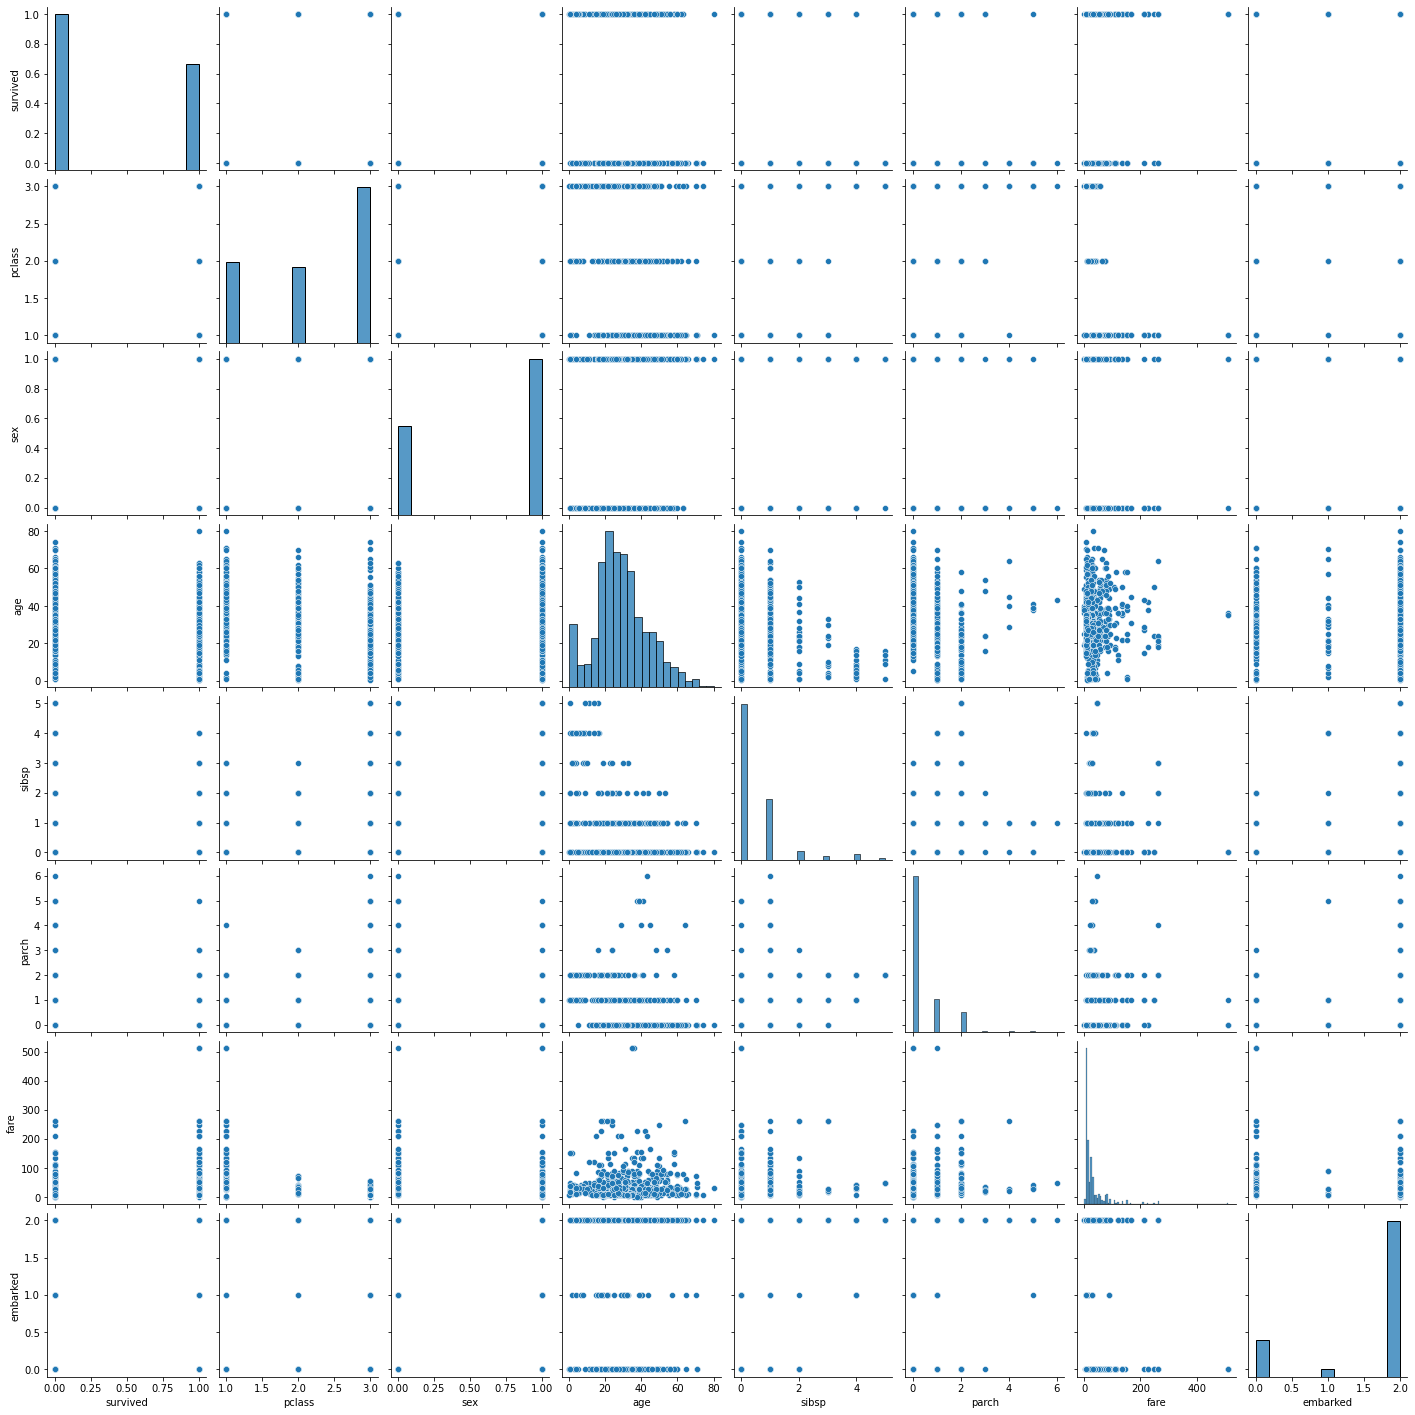

In [26]:
sns.pairplot(titanic)

## 6. Preparation of Training Sets and Testing Sets

Split the data into independent ‘X’ and dependent ‘Y’ data sets.

In [27]:
X = titanic.iloc[:, 1:8].values 
y = titanic.iloc[:, 0].values 

Here, we choose to follow the 80/20 rule(The Pareto principle), therefore 80% training (X_train and Y_train) and 20% testing (X_test and Y_test) data sets.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(569, 7)
(143, 7)


## 7. Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 8. Basic Model Building(Baseline Validation Performance)

Before going further, I like to see how various different models perform with default parameters. I tried the following models using 5 fold cross validation to get a baseline. With a validation set basline, we can see how much tuning improves each of the models. Just because a model has a high basline on this validation set doesn't mean that it will actually do better on the eventual test set.

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [31]:
knn = KNeighborsClassifier()
lr = LogisticRegression(max_iter = 2000)
dt = DecisionTreeClassifier(random_state = 1)
svc = SVC(probability = True)
gnb = GaussianNB()
rf = RandomForestClassifier(random_state = 1)
xgb = XGBClassifier(random_state =1)

In [32]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('knn',knn),('lr',lr),('dt',dt),('svc',svc),('gnb',gnb),('rf',rf),('xgb',xgb)], voting = 'soft') 

In [33]:
names = ['k-Nearest Neighbors', 
         'Logistic Regression', 
         'Decision Tree', 
         'Support Vector Classifier', 
         'Naive Bayes', 
         'Random Forest', 
         'Xtreme Gradient Boosting', 
         'Voting Classifier']

acc = np.array([cross_val_score(knn, X_train, y_train, cv=5).mean(), 
                cross_val_score(lr, X_train, y_train, cv=5).mean(), 
                cross_val_score(dt, X_train, y_train, cv=5).mean(), 
                cross_val_score(svc, X_train, y_train, cv=5).mean(), 
                cross_val_score(gnb, X_train, y_train, cv=5).mean(), 
                cross_val_score(rf, X_train, y_train, cv=5).mean(), 
                cross_val_score(xgb, X_train, y_train, cv=5).mean(), 
                cross_val_score(voting_clf, X_train, y_train, cv=5).mean()])
                
Score = pd.DataFrame({'Model_name': names,
                     'Accuracy_score': acc})
                
Score.sort_values(by='Accuracy_score', ascending=False)

[19:12:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:12:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:12:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:12:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,Model_name,Accuracy_score
3,Support Vector Classifier,0.822559
7,Voting Classifier,0.803245
0,k-Nearest Neighbors,0.801490
1,Logistic Regression,0.799689
4,Naive Bayes,0.794411
6,Xtreme Gradient Boosting,0.790980
5,Random Forest,0.783900
2,Decision Tree,0.724204


## 9. Model Tuning

After getting the baselines, let's see if we can improve on the indivdual model results! I mainly used grid search to tune the models.

In [34]:
from sklearn.model_selection import GridSearchCV 
cv_score = []

### 9.1 k-Nearest Neighbors	

In [35]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : np.arange(1,20,1),
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train, y_train)
best_clf_knn.best_params_

Fitting 5 folds for each of 228 candidates, totalling 1140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 1096 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 1140 out of 1140 | elapsed:    7.6s finished


{'algorithm': 'auto', 'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}

In [36]:
cv_score = np.append(cv_score, [best_clf_knn.best_score_])
best_clf_knn.best_score_

0.8155410650520105

### 9.2 Logistic Regression

In [37]:
lr = LogisticRegression(max_iter=2000, solver='liblinear')
param_grid = {'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20)}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train, y_train)
best_clf_lr.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.2s finished


{'C': 1.623776739188721, 'penalty': 'l2'}

In [38]:
cv_score = np.append(cv_score, [best_clf_lr.best_score_])
best_clf_lr.best_score_

0.7996894892097499

### 9.3 Decision Tree

In [39]:
dt = DecisionTreeClassifier(random_state = 1)
param_grid =  {'criterion':['gini','entropy'],
               'max_depth': np.arange(5,10,1),
               'max_features': ['auto','sqrt', 10],
               'min_samples_leaf': np.arange(1,5,1),
               'min_samples_split': np.arange(5,10,1)}
                                  
clf_dt = GridSearchCV(dt, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_dt = clf_dt.fit(X_train, y_train)
best_clf_dt.best_params_

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2864 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 2985 out of 3000 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:    2.0s finished


{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6}

In [40]:
cv_score = np.append(cv_score, [best_clf_dt.best_score_])
best_clf_dt.best_score_

0.8137556280080732

### 9.4 Support Vector Classifier	

In [41]:
svc = SVC(probability = True, kernel='rbf')
param_grid = tuned_parameters = [{'C': [0.1, 1, 5, 10], 'gamma': [.1,.5, 1]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train, y_train)
best_clf_svc.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished


{'C': 1, 'gamma': 0.1}

In [42]:
cv_score = np.append(cv_score, [best_clf_svc.best_score_])
best_clf_svc.best_score_

0.8207731718677224

### 9.5 Naive Bayes	

In [43]:
gnb = GaussianNB()
param_grid =  {'var_smoothing': [1e-10, 1e-9, 1e-8]}
                                  
clf_gnb = GridSearchCV(gnb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_gnb = clf_gnb.fit(X_train, y_train)
best_clf_gnb.best_params_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished


{'var_smoothing': 1e-10}

In [44]:
gnb.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [45]:
cv_score = np.append(cv_score, [best_clf_gnb.best_score_])
best_clf_gnb.best_score_

0.7944108057755006

### 9.6 Random Forest	

In [46]:
rf = RandomForestClassifier(random_state=1, n_estimators=400, bootstrap=True, max_features='auto')
param_grid =  {'criterion':['gini','entropy'],
               'max_depth': [10, 15],
               'min_samples_leaf': [3, 4],
               'min_samples_split': [2, 3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train, y_train)
best_clf_rf.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   12.5s finished


{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [47]:
cv_score = np.append(cv_score, [best_clf_rf.best_score_])
best_clf_rf.best_score_

0.815556590591523

### 9.7 Xtreme Gradient Boosting	

In [48]:
xgb = XGBClassifier(random_state = 1, n_estimators=500, max_depth=None, reg_alpha=1, learning_rate=0.5, min_child_weight=0.01, sampling_method='uniform')

param_grid = {
    'colsample_bytree': [0.75, 0.8],
    'reg_lambda': [2, 5],
    'subsample': [0.6, .65],
    'gamma':[1, 2]
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train, y_train)
#tuned_acc = np.append(tuned_acc, [best_clf_xgb.best_score_])
best_clf_xgb.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   21.6s finished


[19:13:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'colsample_bytree': 0.75, 'gamma': 2, 'reg_lambda': 2, 'subsample': 0.65}

In [49]:
cv_score = np.append(cv_score, [best_clf_xgb.best_score_])
best_clf_xgb.best_score_

0.8085235211923614

### 9.8 Model evaluation/performance

In [50]:
del names[-1]
tuned_cv_Score = pd.DataFrame({'Model_name': names, 'Accuracy_score': cv_score})
tuned_cv_Score.sort_values(by='Accuracy_score', ascending=False)

,Model_name,Accuracy_score
3,Support Vector Classifier,0.820773
5,Random Forest,0.815557
0,k-Nearest Neighbors,0.815541
2,Decision Tree,0.813756
6,Xtreme Gradient Boosting,0.808524
1,Logistic Regression,0.799689
4,Naive Bayes,0.794411


Now we can see that overall the performance of the models have been improved slightly. The best model so far is still SVC, but we will have a look at the end results after we build the ensemble learning model later.

## 10. Ensemble Model Building

In [51]:
best_knn = best_clf_knn.best_estimator_
best_lr = best_clf_lr.best_estimator_
best_dt = best_clf_dt.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_gnb = best_clf_gnb.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

1. Experiment with a hard voting classifier 
2. Experiment with a soft voting classifier
3. Experiment with weights that are evenly distributed across estimators
4. Experiment with giving extra weight to the top 3 highest performance estimators
5. Experiment with giving extra weight to the top 5 highest performance estimators

In [52]:
voting_clf_all = VotingClassifier(estimators = [('svc',best_svc),('rf',best_rf),('knn',best_knn),('dt',best_dt),('xgb',best_xgb),('lr',best_lr),('gnb',best_gnb)])
params = {'weights' : [ [1,1,1,1,1,1,1], [2,2,2,1,1,1,1], [2,2,2,2,2,1,1] ],
         'voting' : ['soft','hard']}

vote_weight = GridSearchCV(voting_clf_all, param_grid = params, cv = 5, verbose = True, n_jobs = -1)
best_clf_weight = vote_weight.fit(X_train, y_train)
best_clf_weight.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   15.8s finished


[19:14:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('svc', SVC(C=1, gamma=0.1, probability=True)),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_leaf=4,
                                                     n_estimators=400,
                                                     random_state=1)),
                             ('knn', KNeighborsClassifier(n_neighbors=8)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     max_features='auto',
                                                     min_samples_leaf=2,
                                                     min_samples_split=6,
                                                     random_state=1)),
                             (...
                            

In [53]:
cv_score = np.append(cv_score, [best_clf_weight.best_score_])
best_clf_weight.best_score_

0.8243285204160845

## 11. Model Selection

In [54]:
names = np.append(names,'Voting Classifier')
tuned_cv_Score = pd.DataFrame({'Model_name': names, 'Accuracy_score': cv_score})
tuned_cv_Score.sort_values(by='Accuracy_score', ascending=False)

,Model_name,Accuracy_score
7,Voting Classifier,0.824329
3,Support Vector Classifier,0.820773
5,Random Forest,0.815557
0,k-Nearest Neighbors,0.815541
2,Decision Tree,0.813756
6,Xtreme Gradient Boosting,0.808524
1,Logistic Regression,0.799689
4,Naive Bayes,0.794411


Bam!!! This is our final result. The winner goes to ...... Voting Classifier!!

In [55]:
best_model = best_clf_weight.best_estimator_

## 12. Results/Performance

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[19:14:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[75  7]
 [19 42]]
0.6885245901639344
0.8571428571428571
0.8181818181818182
0.7636363636363637
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        82
           1       0.86      0.69      0.76        61

    accuracy                           0.82       143
   macro avg       0.83      0.80      0.81       143
weighted avg       0.82      0.82      0.81       143



## 13. Feature importance

In [57]:
importances = pd.DataFrame({'feature':titanic.iloc[:, 1:8].columns,'importance':np.round(best_rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
sex,0.379
fare,0.200
age,0.151
pclass,0.147
sibsp,0.046
parch,0.044
embarked,0.034


<AxesSubplot:xlabel='feature'>

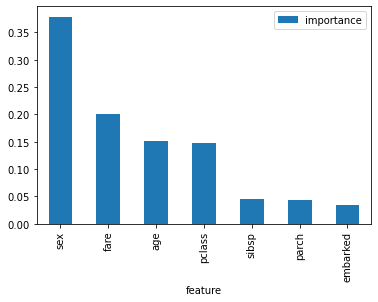

In [58]:
importances.plot.bar()

## 14. Play mode: Can you survive?

Now that we have analyzed the data, created our models, and chosen a model to predict who would’ve survived the Titanic, let’s test and see if I would have survived.

I will create a variable called *my_survival*.
- In it, I will have a *pclass = 3*, meaning I would probably be in the third class because of the cheaper price.
- I am a male, so *sex = 1*.
- I am 22 years young(kidding XD), so I will put *age = 22*.
- Most likely, I would not be on the ship with siblings or spouses, so *sibsp = 0*.
- Nor with any children or parents, so *parch = 0*.
- I would try to pay the minimum fare, because Chinese any way(kidding again XD), so *fare = 0*.
- I not sure where I would embarked from, so I will just randomize it *embarked = random*.

In [59]:
import random

#my survival data: pclass, sex, age, sibsp, parch, fare, embarked
my_survival = [[3, 1, 22, 0, 0, 0, random.randint(0, 2)]]

# standardize the data
my_survival_scaled = sc.fit_transform(my_survival)

#Print Prediction of Random Forest Classifier model
pred = best_model.predict(my_survival_scaled)

if pred == 0:
  print("Oh no! You didn't make it")
else:
  print("Nice! You survived")

Oh no! You didn't make it


... ...

Oh ,f**k!

## References and Learn More

* [Titanic Survival Prediction Using Machine Learning by randerson112358](https://betterprogramming.pub/titanic-survival-prediction-using-machine-learning-4c5ff1e3fa16) - My idea of this project was came from this work of him. I have refered his work to improve my data analyzing, data cleaning and data preprocessing skills. He also covers many different programming languages like Python &  C, machine learning, artificial intelligence (AI), and computer science topics! [Check out his YouTube Channel](https://www.youtube.com/channel/UCbmb5IoBtHZTpYZCDBOC1CA)
<br>

* [Titanic Project Example Walk Through by Ken Jee](https://www.kaggle.com/kenjee/titanic-project-example) - I refered his work to improve my data analyzing, data cleaning and data preprocessing part. By refering his work, I have learn a lot in terms of Multiple Model Building and Model Tuning. He is a Youtuber too. He produce fun and informative Data Science and Sports Analytics Content. [Check out his YouTube Channel](https://www.youtube.com/channel/UCiT9RITQ9PW6BhXK0y2jaeg)
<br>

* [How to make your first Kaggle submission from scratch! by Daniel Bourke](https://github.com/mrdbourke/your-first-kaggle-submission/blob/master/kaggle-titanic-dataset-example-submission-workflow.ipynb) - I also refered to his code as well to enhance my data visualization skills. Yes, you guess it right, he is a Youtuber too. He is also a machine learning engineer who plays at the intersection of technology and health. His video will help you learn better and live healthier.[Check out his YouTube Channel](https://www.youtube.com/channel/UCr8O8l5cCX85Oem1d18EezQ/featured)


## Don't forget!
Feel free to check out my LinkedIn profile.[LinkedIn](https://www.linkedin.com/in/ng-jack-lung-2ba695213/)

Stay safe.
<br>

From,<br> 
Ng Jack Lung aka ReJackTion